In [2]:
import os
import random
import numpy as np
from scipy.stats import chi2_contingency as chiq
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from ggplot import *

os.getcwd()


/home/administrator/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/administrator/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


'/home/administrator'

In [3]:
os.chdir('/home/administrator/Documents/project')

In [7]:
import pandas as pd
churn_data=pd.read_csv("Train_data.csv")
churn_test=pd.read_csv("Test_data.csv")
random.seed(2000)


In [5]:
###exploratory data types
churn_data["area code"]=churn_data["area code"].astype("category")
churn_data["state"]=churn_data["state"].astype("category")
churn_data["international plan"]=churn_data["international plan"].astype("category")
churn_data["voice mail plan"]=churn_data["voice mail plan"].astype("category")
churn_data["Churn"]=churn_data["Churn"].astype("category")
churn_test["Churn"]=churn_data["Churn"].astype("category")
churn_test["state"]=churn_test["state"].astype("category")
churn_test["area code"]=churn_test["area code"].astype("category")
churn_test["international plan"]=churn_test["international plan"].astype("category")
churn_test["voice mail plan"]=churn_test["voice mail plan"].astype("category")
churn_data=churn_data.drop(["phone number"],axis=1)
churn_test=churn_test.drop(["phone number"],axis=1)


In [5]:
churn_data.dtypes

state                            category
account length                      int64
area code                        category
international plan               category
voice mail plan                  category
number vmail messages               int64
total day minutes                 float64
total day calls                     int64
total day charge                  float64
total eve minutes                 float64
total eve calls                     int64
total eve charge                  float64
total night minutes               float64
total night calls                   int64
total night charge                float64
total intl minutes                float64
total intl calls                    int64
total intl charge                 float64
number customer service calls       int64
Churn                            category
dtype: object

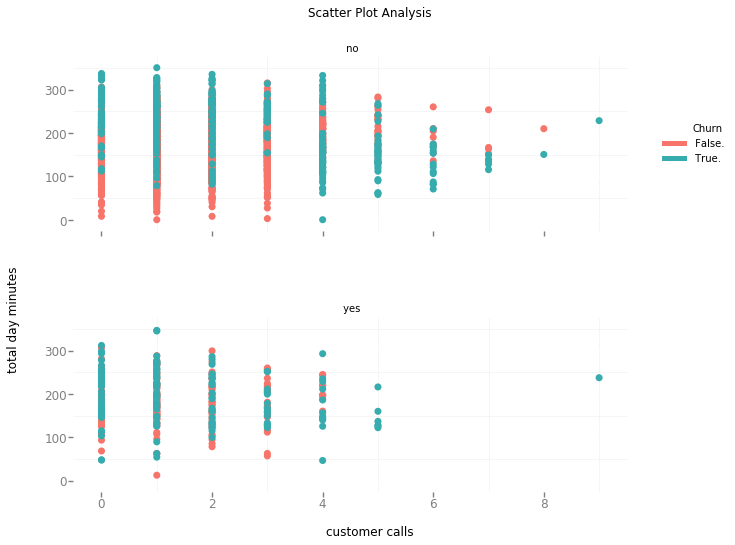

<ggplot: (8787027178935)>

In [17]:
####visualisation
ggplot(churn_data, aes(x = 'number customer service calls', y = 'total day minutes', color='Churn')) + \
     geom_point(alpha = 1, size = 50)+facet_wrap("international plan") + theme_bw()+ ylab("total day minutes") + xlab("customer calls") + ggtitle("Scatter Plot Analysis")


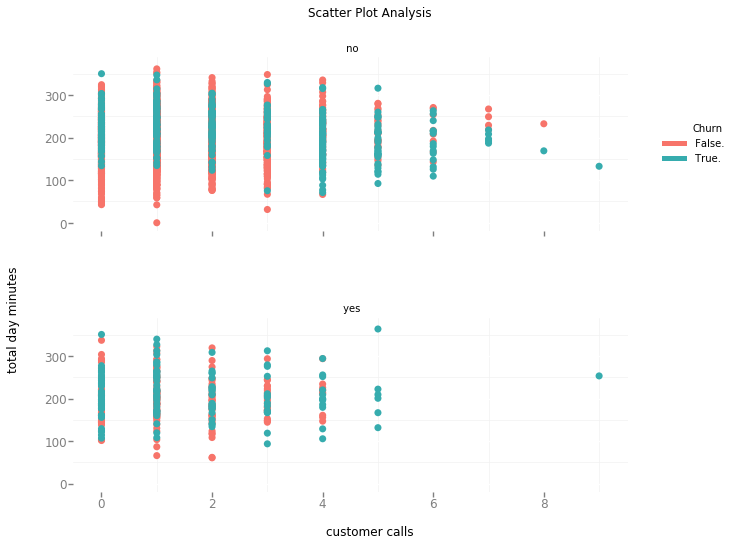

<ggplot: (8773582313683)>

In [10]:
 
ggplot(churn_data, aes(x = 'number customer service calls', y = 'total eve minutes', color='Churn')) + \
    geom_point(alpha = 1, size = 50)+facet_wrap("international plan") + theme_bw()+ ylab("total eve minutes") + xlab("customer calls") + ggtitle("Scatter Plot Analysis")




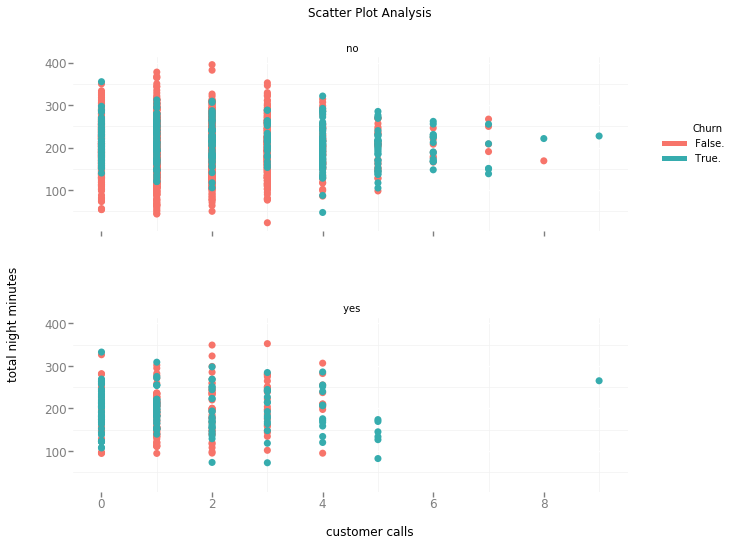

<ggplot: (8773573838656)>

In [35]:
ggplot(churn_data, aes(x = 'number customer service calls', y = 'total night minutes', color='Churn')) + \
    geom_point(alpha = 1, size = 50)+facet_wrap("international plan") + theme_bw()+ ylab("total night minutes") + xlab("customer calls") + ggtitle("Scatter Plot Analysis")

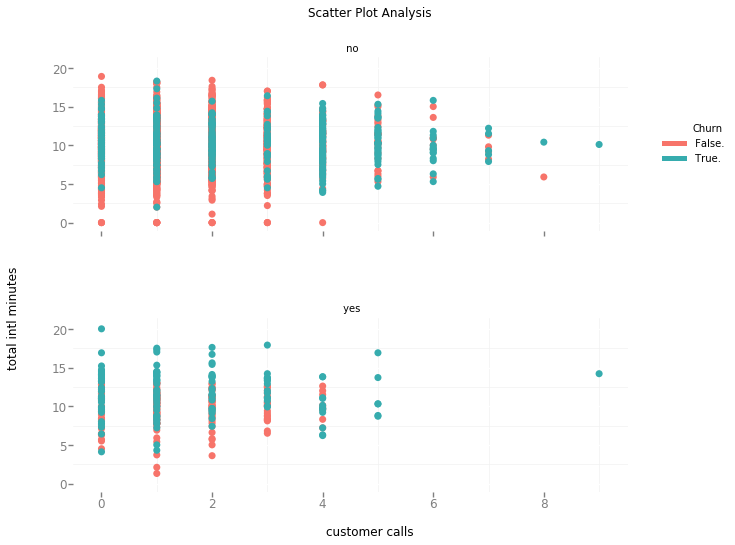

<ggplot: (-9223363263280847072)>

In [34]:
ggplot(churn_data, aes(x = 'number customer service calls', y = 'total intl minutes', color='Churn')) + \
    geom_point(alpha = 1, size = 50)+facet_wrap("international plan") + theme_bw()+ ylab("total intl minutes") + xlab("customer calls") + ggtitle("Scatter Plot Analysis")


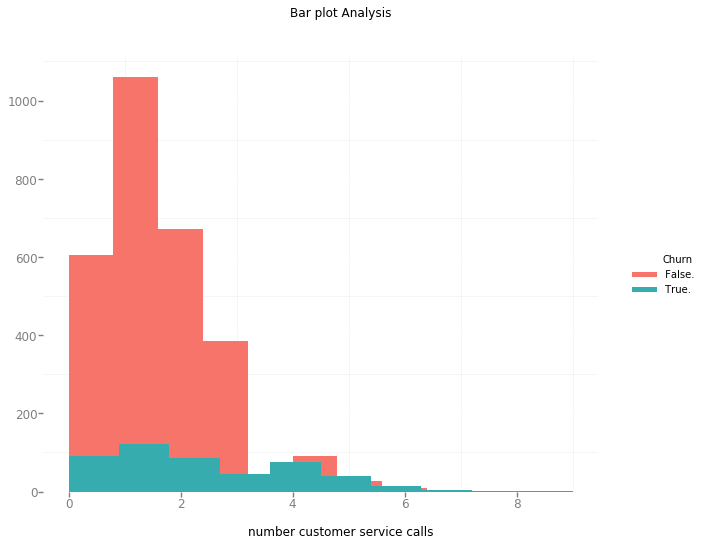

<ggplot: (8773573428116)>

In [41]:
####bar plot
ggplot(churn_data,aes(x='number customer service calls',fill='Churn'))+\
    geom_histogram() +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("number customer service calls")  + ggtitle("Bar plot Analysis") + theme_bw()

In [6]:
###missing value analysis
churn_data.isnull().sum()

state                            0
account length                   0
area code                        0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [7]:
churn_test.isnull().sum()

state                            0
account length                   0
area code                        0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [8]:
churn_test.isnull().sum()

state                            0
account length                   0
area code                        0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [9]:
churn_test

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.
5,IA,117,415,no,no,0,226.5,85,38.51,141.6,68,12.04,223.0,90,10.04,6.9,5,1.86,1,False.
6,ND,63,415,no,yes,32,218.9,124,37.21,214.3,125,18.22,260.3,120,11.71,12.9,3,3.48,1,False.
7,LA,94,408,no,no,0,157.5,97,26.78,224.5,112,19.08,310.8,106,13.99,11.1,6,3.00,0,False.
8,MO,138,510,no,no,0,89.1,117,15.15,126.8,46,10.78,190.5,71,8.57,9.9,4,2.67,2,False.
9,TX,128,415,no,yes,43,177.8,100,30.23,147.3,89,12.52,194.2,92,8.74,11.9,1,3.21,0,False.


In [10]:
 ####chi square test
categorical_col=churn_data.select_dtypes(exclude=["int64","float64","object"])
for i in categorical_col:
    
    chi,p,dof,ex=chiq(pd.crosstab(churn_data["Churn"].rename("s"),categorical_col[i]))
    #print(chi)
    print(str(i)+"="+str(p))
    #print(dof)
    #print(ex)

state=0.00229622155201
area code=0.915055696024
international plan=2.49310770332e-50
voice mail plan=5.15063965904e-09
Churn=0.0


In [11]:
###dropping areacode
churn_data=churn_data.drop(["area code"],axis=1)

churn_test=churn_test.drop(["area code"],axis=1)

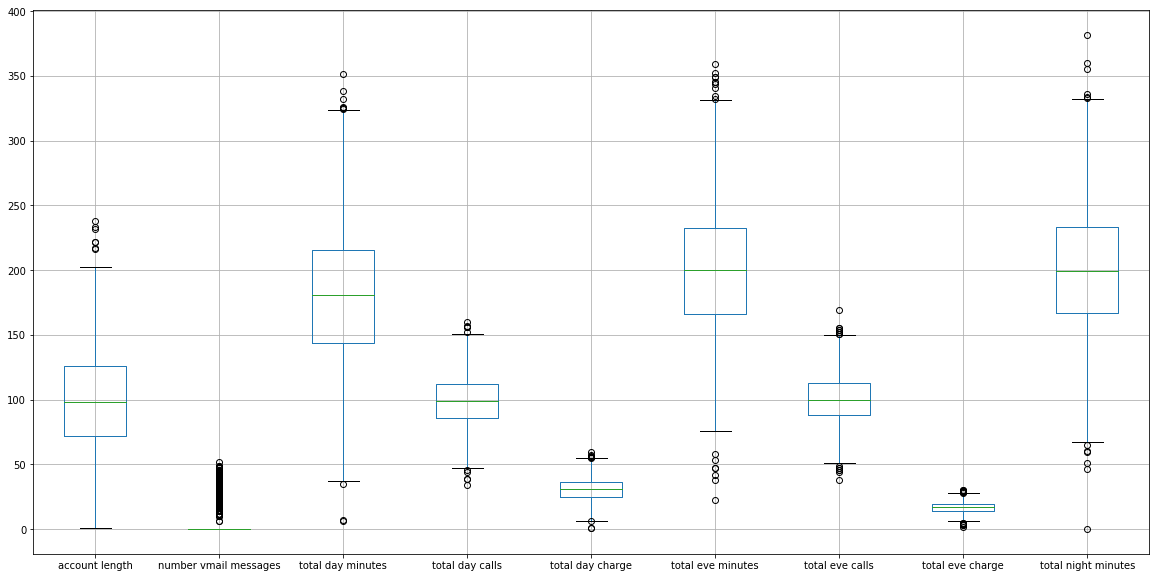

In [12]:
####outlier analysis
cnames=churn_test.select_dtypes(include=[np.number])
cnames1=cnames.iloc[:,:9]
cnames2=cnames.iloc[:,9:]
fig, ax = plt.subplots(figsize=(20,  10))
cnames1.boxplot(ax=ax)


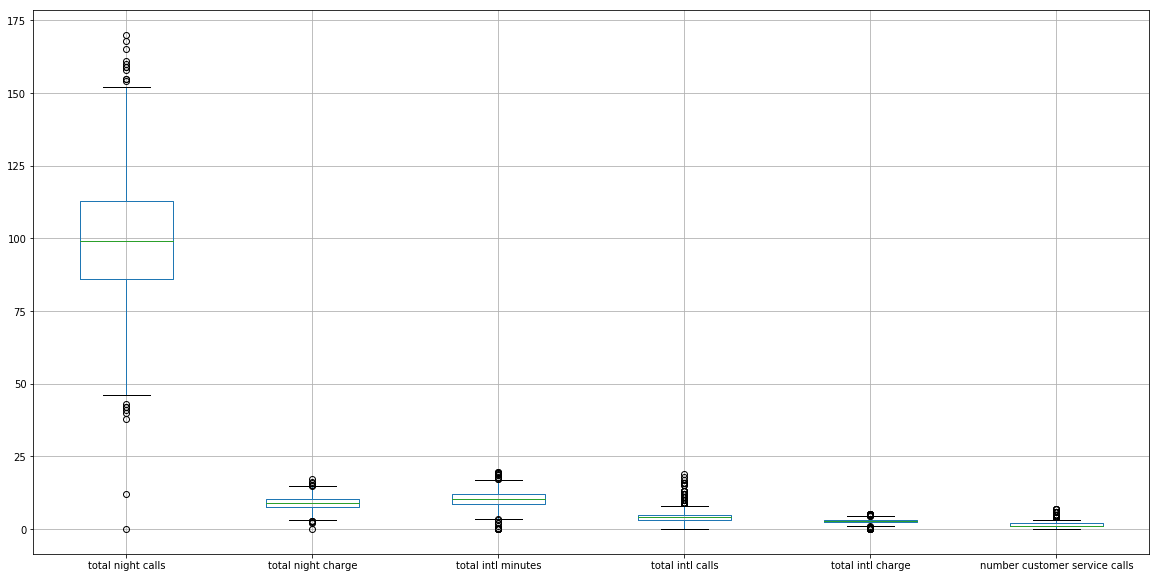

In [13]:
fig, ax = plt.subplots(figsize=(20,  10))
cnames2.boxplot(ax=ax)

In [14]:
cnames1=cnames.drop(["number vmail messages"],axis=1)
cnames1=cnames1.drop(["number customer service calls"],axis=1)
cnames1=cnames1.columns
for i in cnames1:
    q75,q25=np.percentile(churn_data.loc[:,i],[75,25])
    iqr=q75-q25
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
    churn_data=churn_data.drop(churn_data[churn_data.loc[:,i]<minimum].index)
    churn_data=churn_data.drop(churn_data[churn_data.loc[:,i]>maximum].index)


In [15]:
cnames2=cnames.drop(["number vmail messages"],axis=1)
cnames2=cnames2.drop(["number customer service calls"],axis=1)
cnames2=cnames2.columns
for i in cnames2:
    q75,q25=np.percentile(churn_test.loc[:,i],[75,25])
    iqr=q75-q25
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
    churn_test=churn_test.drop(churn_test[churn_test.loc[:,i]<minimum].index)
    churn_test=churn_test.drop(churn_test[churn_test.loc[:,i]>maximum].index)

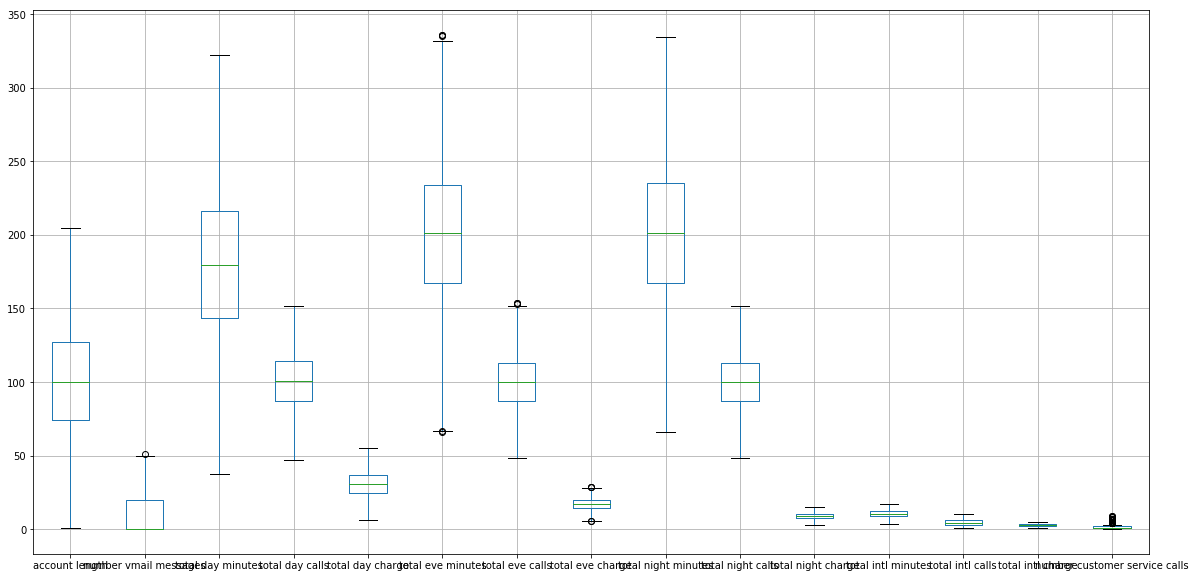

In [16]:
######verification of boxplot analysis
fig, ax = plt.subplots(figsize=(20,  10))
churn_data.boxplot(ax=ax)

In [17]:
####feature engineering
try:
    churn_data["total.day.charge.permin"]=churn_data["total day charge"]/churn_data["total day minutes"]
    churn_data["total.eve.charge.permin"]=churn_data["total eve charge"]/churn_data["total eve minutes"]
    churn_data["total.night.charge.permin"]=churn_data["total night charge"]/churn_data["total night minutes"]
    churn_data["total.intl.charge.permin"]=churn_data["total intl charge"]/churn_data["total intl minutes"]
    churn_test["total.day.charge.permin"]=churn_test["total day charge"]/churn_test["total day minutes"]
    churn_test["total.eve.charge.permin"]=churn_test["total eve charge"]/churn_test["total eve minutes"]
    churn_test["total.night.charge.permin"]=churn_test["total night charge"]/churn_test["total night minutes"]
    churn_test["total.intl.charge.permin"]=churn_test["total intl charge"]/churn_test["total intl minutes"]
except ZeroDivisionError:
    print ("0")

churn_data=churn_data[["state","account length","number vmail messages","total day minutes","total day calls","total day charge","total.day.charge.permin","total eve minutes","total eve calls","total eve charge","total.eve.charge.permin","total night minutes","total night calls","total night charge","total.night.charge.permin","total intl minutes","total intl calls","total intl charge","total.intl.charge.permin","number customer service calls","Churn"]]
churn_test=churn_test[["state","account length","number vmail messages","total day minutes","total day calls","total day charge","total.day.charge.permin","total eve minutes","total eve calls","total eve charge","total.eve.charge.permin","total night minutes","total night calls","total night charge","total.night.charge.permin","total intl minutes","total intl calls","total intl charge","total.intl.charge.permin","number customer service calls","Churn"]]

In [18]:
churn_test

,state,account length,number vmail messages,total day minutes,total day calls,total day charge,total.day.charge.permin,total eve minutes,total eve calls,total eve charge,...,total night minutes,total night calls,total night charge,total.night.charge.permin,total intl minutes,total intl calls,total intl charge,total.intl.charge.permin,number customer service calls,Churn
0,HI,101,0,70.9,123,12.05,0.169958,211.9,73,18.01,...,236.0,73,10.62,0.045000,10.6,3,2.86,0.269811,3,False.
1,MT,137,0,223.6,86,38.01,0.169991,244.8,139,20.81,...,94.2,81,4.24,0.045011,9.5,7,2.57,0.270526,0,False.
2,OH,103,29,294.7,95,50.10,0.170003,237.3,105,20.17,...,300.3,127,13.51,0.044988,13.7,6,3.70,0.270073,1,False.
3,NM,99,0,216.8,123,36.86,0.170018,126.4,88,10.74,...,220.6,82,9.93,0.045014,15.7,2,4.24,0.270064,1,False.
4,SC,108,0,197.4,78,33.56,0.170010,124.0,101,10.54,...,204.5,107,9.20,0.044988,7.7,4,2.08,0.270130,2,False.
5,IA,117,0,226.5,85,38.51,0.170022,141.6,68,12.04,...,223.0,90,10.04,0.045022,6.9,5,1.86,0.269565,1,False.
6,ND,63,32,218.9,124,37.21,0.169986,214.3,125,18.22,...,260.3,120,11.71,0.044987,12.9,3,3.48,0.269767,1,False.
7,LA,94,0,157.5,97,26.78,0.170032,224.5,112,19.08,...,310.8,106,13.99,0.045013,11.1,6,3.00,0.270270,0,False.
9,TX,128,43,177.8,100,30.23,0.170022,147.3,89,12.52,...,194.2,92,8.74,0.045005,11.9,1,3.21,0.269748,0,False.
10,AR,113,39,209.8,77,35.67,0.170019,164.1,90,13.95,...,159.7,100,7.19,0.045022,9.0,4,2.43,0.270000,1,True.


In [19]:
###visuliation
    #Multivariate #Scatter Plot #shape = 'profession'
ggplot(marketing_train, aes(x = 'number customer service calls', y = 'total day minutes', color='responded', shape = 'profession')) + \
    geom_point(alpha = 1, size = 50) + theme_bw()+ ylab("total day calls") + xlab("Cust serv calls") + ggtitle("Scatter Plot Analysis")

NameError: name 'ggplot' is not defined

In [ ]:
##feature scaling

%matplotlib inline  
plt.hist(churn_test['number vmail messages'], bins='auto')






In [ ]:

##standardisation 
for i in cnames:
    print(i)
    churn_data[i] = (churn_data[i] -churn_data[i].min())/churn_data[i].std()
    


churn_data

In [49]:
for i in cnames:
    print(i)
    churn_test[i] = (churn_test[i] -churn_test[i].min())/churn_test[i].std()
    churn_test


account length
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
number customer service calls


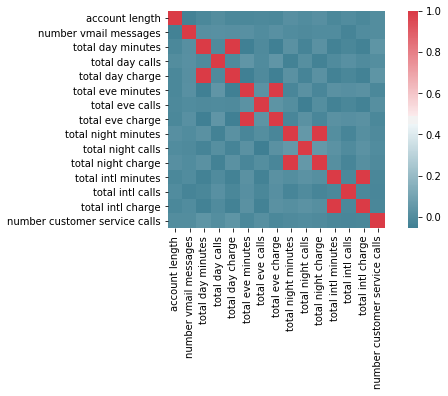

In [50]:
###correlation test
height,width=plt.subplots(figsize=(8,4))
res=cnames.corr()
sn.heatmap(res,mask=np.zeros_like(res,dtype=np.bool),cmap=sn.diverging_palette(220,10,as_cmap=True),square=True,ax=width)



In [51]:
cnames=churn_data.select_dtypes(include=[np.number])
vif=pd.DataFrame()
vif["values"]=[variance_inflation_factor(cnames.values,i) for i in range(cnames.shape[1])]
vif["columns"]=cnames.columns
vif.round(1)

,values,columns
0,7.5,account length
1,1.4,number vmail messages
2,304916097.3,total day minutes
3,8.8,total day calls
4,304898911.8,total day charge
5,244648590.2,total.day.charge.permin
6,145428019.2,total eve minutes
7,8.4,total eve calls
8,145426995.4,total eve charge
9,212336164.9,total.eve.charge.permin


In [52]:
####feature selection
churn_data=churn_data.drop(["total day charge","total eve charge","total night charge","total intl charge"],axis=1)
churn_test=churn_test.drop(["total day charge","total eve charge","total night charge","total intl charge"],axis=1)

In [87]:
###decision classifier
churn_test["state"]=churn_test["state"].cat.codes
churn_data["state"]=churn_data["state"].cat.codes
dec_model=DecisionTreeClassifier(criterion="gini").fit(churn_data.iloc[:,0:16],churn_data.iloc[:,16])
output_dec=dec_model.predict(churn_test.iloc[:,:16])

In [55]:
pd.DataFrame(output_dec)

,0
0,False.
1,False.
2,True.
3,False.
4,False.
5,False.
6,False.
7,False.
8,False.
9,False.


In [88]:
CM = pd.crosstab(churn_test.iloc[:,16], output_dec)

In [89]:
CM

col_0,False.,True.
Churn,,
False.,1075,195
True.,147,35


In [90]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)


76.44628099173553

In [91]:
##tuning and cross validation
parameters={"max_depth":[3,None],
           "min_samples_leaf":randint(1,9),
           "criterion":["gini","entropy"]}
t=DecisionTreeClassifier()
tree_cv=RandomizedSearchCV(t,parameters,cv=10)

In [92]:
tree_cv.fit(churn_data.iloc[:,0:16],churn_data.iloc[:,16])

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9cf4668668>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [93]:

print("tuned decision tree parameters:{}".format(tree_cv.best_params_))
print("best score is {}".format(tree_cv.best_score_))

tuned decision tree parameters:{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
best score is 0.8985887758450936


In [94]:
output_dec_tuned=tree_cv.predict(churn_test.iloc[:,:16])
CM = pd.crosstab(churn_test.iloc[:,16], output_dec_tuned)
CM

col_0,False.,True.
Churn,,
False.,1208,62
True.,175,7


In [95]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)

83.67768595041322

In [96]:
###random forest
RF_model = RandomForestClassifier(n_estimators = 30).fit(churn_data.iloc[:,0:16],churn_data.iloc[:,16])
output_rf=RF_model.predict(churn_test.iloc[:,:16])
CM = pd.crosstab(churn_test.iloc[:,16], output_dec_tuned)
CM

col_0,False.,True.
Churn,,
False.,1208,62
True.,175,7


In [97]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)

83.67768595041322

In [68]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(churn_data.iloc[:,0:16],churn_data.iloc[:,16])

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.3s
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.3s
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   2.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.4s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   2.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   2.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   2.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   2.4s
[CV] n_estimators=157, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_s

[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.4s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.7s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.7s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.2s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=94, min_samples

[CV]  n_estimators=178, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   1.7s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=178, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   1.7s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.3s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.3s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=31, min_samples

[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.6s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.6s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.8s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.8s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=157, min_

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.4s


[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.0s
[CV] n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.1s
[CV] n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.0s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.0s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=52, min_sam

[CV]  n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.4s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.5s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.4s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.4s
[CV] n_estimators=52, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=5, 

[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   1.1s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   1.1s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   1.3s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   1.1s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=136, min_samples_

[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.1s
[CV] n_estimators=136, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=31, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.4s
[CV] n_estimators=136, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=31, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.4s
[CV]  n_estimators=31, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.5s
[CV] n_estimators=136, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV] n_estimators=136, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=136, m

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   2.3s
[CV] n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   2.3s
[CV] n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.0s
[CV]  n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.0s
[CV] n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV] n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=115, min_sa

[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.0s
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   1.0s
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   0.9s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   0.9s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=73, min_sam

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min


[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.1s
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.9s
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.0s
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=115, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.0s
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=115, min_sampl

[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.8s
[CV] n_estimators=94, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.8s
[CV] n_estimators=94, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.8s
[CV] n_estimators=94, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.8s
[CV] n_estimators=94, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=2, 

[CV] n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.3s
[CV] n_estimators=31, min_samples_split=

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=200, min_samples_

[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.6s
[CV] n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.7s
[CV] n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.7s
[CV] n_estimators=178, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.6s
[CV] n_estimators=178, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=52, min_s

[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   1.1s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   1.1s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   1.1s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   1.1s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples

[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.2s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.1s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.1s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.3s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=157, min_samples_

[CV]  n_estimators=136, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   1.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=136, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   1.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_split

[CV]  n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   1.5s
[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   1.6s
[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   1.5s
[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   1.5s
[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min


[CV]  n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.3s
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.3s
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.4s
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.3s
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=157, min_

[CV]  n_estimators=136, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   1.3s
[CV] n_estimators=136, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=136, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   1.6s
[CV] n_estimators=136, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=136, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   1.2s
[CV] n_estimators=94, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=136, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   1.2s
[CV] n_estimators=94, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=136, min_sample

[CV]  n_estimators=136, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.5s
[CV] n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=136, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.7s
[CV] n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.1s
[CV] n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.9s
[CV] n_estimators=73, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=73, min_samples

[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   1.3s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   1.4s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   1.4s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   1.3s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=157, min_samples_

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.7s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.7s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.8s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.7s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=94, min_samples_spl

[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   0.4s
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   0.4s
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   0.4s
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   0.5s
[CV] n_estimators=52, min_sa

[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.9s
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.8s
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.9s
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.9s
[CV] n_estimators=52, min_samples_

[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   0.6s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   1.2s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   1.3s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   0.6s
[CV] n_estimators=73, min_samp

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.2s
[CV] n_estim

[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.7s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.7s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   0.4s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.7s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=31, min_samp

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   1.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.9min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [69]:
rf_random.best_params_


{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [70]:
rf_out=rf_random.predict((churn_test.iloc[:,:16]))

In [72]:
CM = pd.crosstab(churn_test.iloc[:,16], rf_out)
CM

col_0,False.,True.
Churn,,
False.,1173,97
True.,172,10


In [73]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)

81.47382920110194

In [236]:
#####knn regression


In [74]:
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(churn_data.iloc[:,0:16],churn_data.iloc[:,16])

In [76]:
knn_output=KNN_model.predict(churn_test.iloc[:,:16])
knn_output
CM = pd.crosstab(churn_test.iloc[:,16], rf_out)
CM

col_0,False.,True.
Churn,,
False.,1173,97
True.,172,10


In [77]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)

81.47382920110194

In [78]:
###naive bayes algorithm
NB_model = GaussianNB().fit(churn_data.iloc[:,0:16],churn_data.iloc[:,16])
NB_Predictions = NB_model.predict(churn_test.iloc[:,:16])
CM = pd.crosstab(churn_test.iloc[:,16], NB_Predictions)
CM

col_0,False.,True.
Churn,,
False.,1206,64
True.,173,9


In [79]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)

83.67768595041322